# Analyse de données
## Tutorial sur l'implémentation de régression linéaire

Ce Notebook est une implémentation de la régression régression linéaire sur un jeu de données factice. Il sert comme support au cours à la page [allophysique.com//docs/NSI_1/algo/page1/](allophysique.com//docs/NSI_1/algo/page1/)

### Chargement des diverses librairies utiles pour ce notebook 

In [61]:
# chargement de bibliothéques 
"""
instruction specifique pour utiliser matplotlib dans un notebook 
quand on utilise les notebooks Jupyter pour utiliser Matplotlib
"""
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Chargement du jeu de données
On met le tableau dans un *Dataframe* et on l'observe. Les données de population sont exprimées en 10 000 habitants et celles du profit en 10 000 USD

In [108]:
# Version Jupyterlite
import pandas as pd  # on importe la librairie pandas 
from js import fetch

URL = "https://raw.githubusercontent.com/tix06/jupyterlite_NSI/master/files/datas/datas_trucks.csv"

res = await fetch(URL)
text = await res.text()

filename = 'datas_trucks.csv'

with open(filename, 'w') as f:
    f.write(text)

df = pd.read_csv(filename, sep=';')

In [68]:
df

,population,profit,trucks
0,6.1101,17.59200,160
1,5.5277,9.13020,140
2,8.5186,13.66200,100
3,7.0032,11.85400,440
4,5.8598,6.82330,200
...,...,...,...
92,5.8707,7.20290,100
93,5.3054,1.98690,20
94,8.2934,0.14454,1
95,13.3940,9.05510,19


## Creation des listes population, profit et trucks

In [109]:
X = df['population']
Y = df['profit']
Z = df['trucks']

## Visualisation du jeu de données
Recherche des **correlations entre X, Y et Z**

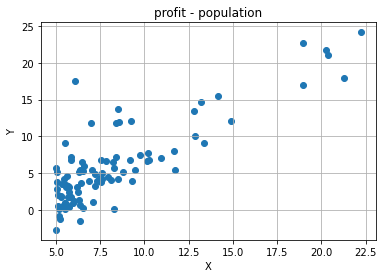

In [110]:
# Correlation X, Y
axes = plt.axes()
axes.grid()
plt.title("profit - population")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X,Y)
plt.show()

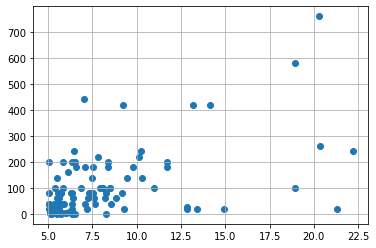

In [89]:
plt.clf()
axes = plt.axes()
axes.grid()
# à completer
plt.scatter(X,Z)
plt.show()

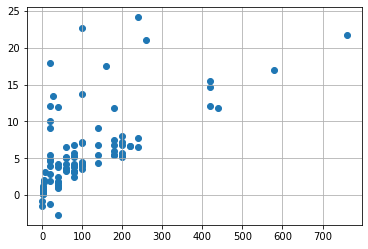

In [85]:
plt.clf()
axes = plt.axes()
axes.grid()
# à completer
plt.scatter(Z,Y)
plt.show()

### régression linéaire


On peut utiliser le module librairie SciPy (Scientific Python) pour implémenter une régression linéaire. Le sous package stats propose la fonction linregress qui calcule une régression à partir d'un jeu de donnée d'entrainement 

In [94]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
slope, intercept, r_value

(1.1930336441895941, -3.8957808783118555, 0.837873232526341)

### Modèle obtenu

Le fonction de prédiction pour une régression linéaire a pour équation :


\begin{align}
H(x) = intercept + slope * x
\end{align}

avec :
* $slope$ : représente la **pente** de la courbe modélisée (la fonction de prédiction) 
* $intercept$ : représente l'**ordonnée à l'orgine** (le point d'intersection avec l'axe des ordonnées)
* $r_value$: le **coefficient de correlation**
    * Une valeur proche de 1 signifie qu'il y a une bonne correlatoin entre les grandeurs, et que l'on peut considérer le modèle comme valide.
    * Une faible valeur (inf à 0.8 par exemple) signifie que les grandeurs ne sont pas vraiment correlées.
    
Ainsi notre fonction $H(X)$ se décrit comme suit : 

\begin{align}
H(X) = -4.211504005424089 + 1.2135472539083585 * X\\
r = 0.837873232526341
\end{align}


### Regression linéaire sur X - Z
calculer les coefficients de regression pour Z = f(X)

In [95]:
# à completer
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Z)
slope, intercept, r_value

(17.149786003209716, -32.86665888053702, 0.5126690163242533)

### Regression linéaire sur Z - Y
calculer les coefficients de regression pour Y = f(Z)

In [96]:
# à completer
slope, intercept, r_value, p_value, std_err = stats.linregress(Z, Y)
slope, intercept, r_value

(0.02734147495063942, 2.9116241356975165, 0.6423462576541682)

## Ecriture de la fonction de prédiction avec Python

Vu qu'on dispose de notre fonction des coefficients de notre fonction de prédiction, on peut écrire celle-ci en python. 

> Compléter la fonction `H` pour que celle-ci renvoie la valeur calculée H(X) à l'aide des coefficients calculée `slope` et `intercept`

In [102]:
def H(x, slope, intercept):
    # à completer
    return slope * x + intercept

## Dessiner la fonction de prédiction 

On peut utiliser la fonction de prédiction qu'on vient de définir pour avoir la valeur prédite par la fonction hypothèse pour chacune des observations de notre jeu d'entrainement. Ainsi on pourra voir visuellement comment la fonction de prédiction "approche" le jeu d'entrainement.

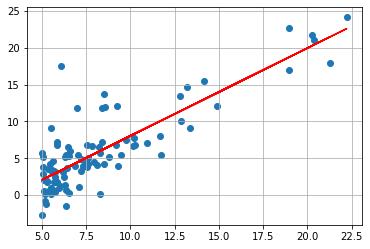

In [103]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
fitLine = predict(X)
plt.plot(X, fitLine, c='r')
plt.show()

## Prédiction d'une nouvelle observation

On voit que pour pour la valeur x = 22.5, la valeur de y pour est environ 25. Utilisons la fonction `H` pour trouver une estimation de `H(x = 22.5)`

In [105]:
H(11.7,slope,intercept)

10.062712758706395

### Calculer l'écart avec la valeur du tableau
filtrer le tableau selon la valeur `filtre = df['population'] == 11.7` et afficher la ligne *Dataframe df* correspondante.

In [106]:
# à completer
filtre = df['population'] == 11.7
df[filtre]

,population,profit,trucks,profil_rel
48,11.7,8.0043,200,400.215


### Calculer alors l'écart constaté avec la prédiction

In [ ]:
# à completer

### La partie de la courbe pour laquelle la population est comprise entre 15 et 20 est vide de points. Calculer l'une de ces valeurs avec la fonction `H`

In [ ]:
# à completer

## Profit relatif au nombre de trucks-food
On peut rechercher également quel est le *profit relatif* au nombre de trucks-food déjà present dans une ville.

Créer une nouvelle colonne dans le *Dataframe* avec:

```python
df['profil_rel'] = df['profit']*10000 / df['trucks'] 
```

In [ ]:
# à completer
df['profil_rel'] = df['profit']*10000 / df['trucks'] 

### Graphique `profit-rel` 
visualiser l'eventuelle correlation entre le *profit relatif* et l'une des données du tableau

In [77]:
# à completer

## Trier les données du *Dataframe* selon la colonne *profit_rel*
Et retrouver ainsi le meilleur emplacement

La fonction de tri sur un *Dataframe* a été vue dans `TP4/datas_analyse_pandas.ipynb` ainsi que dans `TP1/sequence2.ipynb`